In [2]:
from IPython.display import clear_output

In [3]:
from anchor import utils
from anchor import anchor_tabular
import pandas as pd
import sklearn.ensemble
import numpy as np
from anchor import anchor_tabular

In [4]:
from anchor import utils
from anchor import anchor_tabular

dataset_folder = '../datasets/'
dataset = utils.load_dataset('recidivism', balance=True, dataset_folder=dataset_folder, discretize=True)

In [4]:
c = sklearn.ensemble.RandomForestClassifier(n_estimators=50, n_jobs=5)
c.fit(dataset.train, dataset.labels_train)
print('Train', sklearn.metrics.accuracy_score(dataset.labels_train, c.predict(dataset.train)))
print('Test', sklearn.metrics.accuracy_score(dataset.labels_test, c.predict(dataset.test)))

Train 0.935226264418811
Test 0.7531914893617021


In [1]:
transformed_data = []

for r in dataset.train:
    transformed_data.append([dataset.categorical_names[i][int(r_)] for i, r_ in enumerate(r)])        

print(transformed_data[0])

train_data = pd.DataFrame(transformed_data, columns=dataset.feature_names)
print(train_data.shape)
nb_vals = 75

y=[]
for k in range(0, nb_vals):
    y.append(c.predict(dataset.train[k].reshape(1, -1))[0])


NameError: name 'dataset' is not defined

In [6]:
import arg_explainer as ae
from importlib import reload
reload(ae)
import arg_explainer as ae
explainer = ae.ArgTabularExplainer(c, train_data.iloc[0:nb_vals], y, 'rcdv_' + str(nb_vals), compute=True)

Generating arguments
750  potential arg checked.
len  1 : 1 ,  0
5250  potential arg checked.
len  2 : 46 ,  66
22750  potential arg checked.
len  3 : 265 ,  248
68250  potential arg checked.
len  4 : 237 ,  214
150150  potential arg checked.
len  5 : 58 ,  55
250250  potential arg checked.
len  6 : 7 ,  11
321750  potential arg checked.
len  7 : 0 ,  0
Saving to  saves/rcdv_50_minimals.df


rcdv_50
len(R_atk) =  60720
5 highest degrees: [(frozenset({2, 4, 10, 13, 16, 21}), 506)
 (frozenset({2, 4, 10, 12, 14, 21}), 506)
 (frozenset({2, 4, 10, 16, 21, 27}), 515) (frozenset({18}), 523)
 (frozenset({2, 4, 8, 10, 14, 21}), 527)]


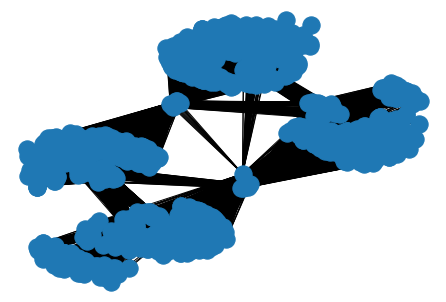

In [7]:
explainer.build_attack_graph(compute=True, display_graph=True)

In [ ]:
explainer.set_strategy('max_covi')
## Define strategy before calling explainer.explain()
explainer.display_explanations()

0.08328898204184201


In [ ]:
anchor_explainer = anchor_tabular.AnchorTabularExplainer(
    dataset.class_names,
    dataset.feature_names,
    dataset.train,
    dataset.categorical_names)
idx = 0
np.random.seed(1)
instance = dataset.train[idx].reshape(1, -1)[0]
print("Anchor")
print([dataset.categorical_names[i][int(r_)] for i, r_ in enumerate(instance)])

print('Prediction: ', anchor_explainer.class_names[c.predict(dataset.train[0].reshape(1, -1))[0]])
exp = anchor_explainer.explain_instance(dataset.train[idx], c.predict, threshold=0.95)
print('Anchor: %s' % (' AND '.join(exp.names())))
print('Precision: %.2f' % exp.precision())
print('Coverage: %.2f' % exp.coverage())

print("Arg:", idx)
print(explainer.explain_instance(idx))

In [ ]:
train_data = pd.read_csv("../datasets/rcdv/train.csv")
# test_data = pd.read_csv("datasets/rcdv/test.csv")
train_data.head()

Preprocessing from https://www.kaggle.com/saraswat40/titanic-simple-tensorflow-neural-network


In [ ]:
# Data pre-analysis: Kaggle
train_test_combined = pd.concat([train_data, test_data], axis=0, sort=True)

sns.countplot(x='Race', data=train_test_combined, hue='Recidivism_Within_3years')
plt.xticks
plt.show()

sns.countplot(x='Gender', data=train_test_combined, hue='Recidivism_Within_3years')
plt.xticks
plt.show()

In [ ]:
# Data cleanup: Kaggle
train_data_clean1 = train_data.drop(columns=['Recidivism_Arrest_Year1','Recidivism_Arrest_Year2','Recidivism_Arrest_Year3'])
train_data_clean1 = train_data_clean1.iloc[0:1000]
#test_data_clean1 = test_data.drop(columns=['Recidivism_Arrest_Year1','Recidivism_Arrest_Year2','Recidivism_Arrest_Year3'])
train_data_clean1.head()

# Missing values in data
print("Missing values in train:")
print(train_data_clean1.isnull().sum())
#print("Missing values in test:")
#print(test_data_clean1.isnull().sum())

# Replace missing by mean value in train
train_data_clean2 = train_data_clean1.copy()
mean_srsf = train_data_clean1['Supervision_Risk_Score_First'].mean()
train_data_clean2['Supervision_Risk_Score_First'].fillna(mean_srsf, inplace=True)
mean_adpd = train_data_clean1['Avg_Days_per_DrugTest'].mean()
train_data_clean2['Avg_Days_per_DrugTest'].fillna(mean_adpd, inplace=True)
mean_dtthc = train_data_clean1['DrugTests_THC_Positive'].mean()
train_data_clean2['DrugTests_THC_Positive'].fillna(mean_dtthc, inplace=True)
mean_dtc = train_data_clean1['DrugTests_Cocaine_Positive'].mean()
train_data_clean2['DrugTests_Cocaine_Positive'].fillna(mean_dtc, inplace=True)
mean_dtm = train_data_clean1['DrugTests_Meth_Positive'].mean()
train_data_clean2['DrugTests_Meth_Positive'].fillna(mean_dtm, inplace=True)
mean_dto = train_data_clean1['DrugTests_Other_Positive'].mean()
train_data_clean2['DrugTests_Other_Positive'].fillna(mean_dto, inplace=True)
mean_pde = train_data_clean1['Percent_Days_Employed'].mean()
train_data_clean2['Percent_Days_Employed'].fillna(mean_pde, inplace=True)
mean_jpy = train_data_clean1['Jobs_Per_Year'].mean()
train_data_clean2['Jobs_Per_Year'].fillna(mean_jpy, inplace=True)
train_data_clean2['Gang_Affiliated'].fillna('na', inplace=True)
train_data_clean2['Supervision_Level_First'].fillna('na', inplace=True)
train_data_clean2['Prison_Offense'].fillna('na', inplace=True)

print("CLeaning...")
print("Missing values in train:")
print(train_data_clean2.isnull().sum())

# Replace missing by mean value in test
#test_data_clean2 = test_data_clean1.copy()
#mean_age_test = test_data_clean1['Age'].mean()
#test_data_clean2['Age'].fillna(mean_age_test, inplace=True)
#mean_fare_test = test_data_clean1['Fare'].mean()
#test_data_clean2['Fare'].fillna(mean_fare_test, inplace=True)
# Maybe later...


In [ ]:
# Quantile based discretization with pandas qcut
train_data_clean3 = train_data_clean2.copy()
train_data_clean3['Residence_PUMA'] = pd.qcut(train_data_clean2['Residence_PUMA'], 8)
train_data_clean3['Avg_Days_per_DrugTest'] = pd.qcut(train_data_clean2['Avg_Days_per_DrugTest'], 8, duplicates='drop')
train_data_clean3['DrugTests_THC_Positive'] = pd.qcut(train_data_clean2['DrugTests_THC_Positive'], 8, duplicates='drop')
train_data_clean3['DrugTests_Cocaine_Positive'] = pd.qcut(train_data_clean2['DrugTests_Cocaine_Positive'], 8, duplicates='drop')
train_data_clean3['DrugTests_Meth_Positive'] = pd.qcut(train_data_clean2['DrugTests_Meth_Positive'], 8, duplicates='drop')
train_data_clean3['DrugTests_Other_Positive'] = pd.qcut(train_data_clean2['DrugTests_Other_Positive'], 8, duplicates='drop')
train_data_clean3['Percent_Days_Employed'] = pd.qcut(train_data_clean2['Percent_Days_Employed'], 8, duplicates='drop')
train_data_clean3['Jobs_Per_Year'] = pd.qcut(train_data_clean2['Jobs_Per_Year'], 8, duplicates='drop')

y = train_data_clean3['Recidivism_Within_3years']
train_data_clean3 = train_data_clean3.drop(columns=['Gang_Affiliated','Recidivism_Within_3years', 'Residence_PUMA', 'Avg_Days_per_DrugTest', 
                                                    'DrugTests_THC_Positive','DrugTests_Cocaine_Positive','DrugTests_Meth_Positive',
                                                    'DrugTests_Other_Positive','Percent_Days_Employed','Jobs_Per_Year'])

oh_enc = OneHotEncoder(handle_unknown='ignore', sparse=True)
X = oh_enc.fit_transform(train_data_clean3).todok()
feature_names = oh_enc.get_feature_names_out(train_data_clean3.columns)
t_X = X.transpose().toarray()
print(X.shape)

In [ ]:
import arg_explainer as ae
from importlib import reload
reload(ae)
import arg_explainer as ae
explainer = ae.ArgTabularExplainer(None, train_data.iloc[0:nb_vals], y, 'adult_' + str(nb_vals), compute=False)

In [ ]:
# Arg gen

instances_by_feature = {}

for i, col in enumerate(t_X):
    instances_by_feature.update({i: list(np.where(col)[0])})

print(instances_by_feature)

# Coverage
covi_by_arg = dict()
covc_by_arg = dict()

def generate_args_lenN(n, ibyf, dataset, predictions, minimals=None):
    """
    Generates arguments of length n, given arguments of length 1.. n-1
    :param n: length of arguments to be generated
    :param ibyf: instances_by_feature
    :param predictions:
    :param minimals: arguments (minimal)
    :return:
    """

    def is_minimal(potential_arg, cl, minimals, n):
        # cl is class
        set_potential_arg = set(potential_arg)
        for k in range(n):
            for comb_ in combinations(potential_arg, k+1):
                if frozenset(comb_) in minimals[cl][k]:
                    return False
        return True

    if minimals is None:
        minimals = ([], [])
    assert len(minimals[0]) == n-1
    minimals[0].append(set())
    minimals[1].append(set())

    args = [set(), set()]
    potential_args_checked_count = 0
    for i, row in enumerate(dataset):
        for potential_arg in combinations(np.where(row)[0], n):
            cl = predictions[i]
            potential_args_checked_count += 1
            if not is_minimal(potential_arg, cl, minimals, n-1):
                continue
            selection = set.intersection(*[set(ibyf[w]) for w in potential_arg])  # all rows with all features of potential argument
            selection_preds = [predictions[i_] for i_ in selection]
            if selection_preds[:-1] == selection_preds[1:]:
                    args[selection_preds[0]].add(frozenset(potential_arg))
                    covi_by_arg.update({frozenset(potential_arg): selection}) #covi
                    minimals[cl][n-1].add(frozenset(potential_arg))
                    covc_by_arg.update({frozenset(potential_arg): set(selection_preds)}) #covc
    print(potential_args_checked_count, ' potential arg checked.')
    return args, minimals

  

def read_args(minimals, feature_names):
    arguments = [[], []]
    for cl in range(len(minimals)):
        for a in range(len(minimals[cl])):
            for f in minimals[cl][a]:
                arguments[cl].append(tuple([feature_names[k] for k in f]))
    return arguments

In [ ]:
n = 0
minimals = None
print("len ", n, ":", minimals)
while not minimals or len(minimals[0][-1]) != 0 or len(minimals[1][-1]) != 0 or n<1:
    n += 1
    args, minimals = generate_args_lenN(n, instances_by_feature, X.toarray(), y, minimals)
    print("len ", n, ":", minimals)

In [ ]:
pprint(read_args(minimals, feature_names)[0])

In [ ]:
pprint(read_args(minimals, feature_names)[1])

In [ ]:
from os import path
import networkx as nx
import pydot

def consistent(arg1, arg2, col_p_features):
    for f1, f2 in zip(list(arg1), list(arg2)):
        if f1 != f2 and col_p_feature[f1] == col_p_feature[f2]:
            return False
    return True

def build_r_atk(minimals, col_p_feature, output_path=''):
    R_atk = []
    for cl in range(2):
        for l in range(len(minimals[cl])):
            for h1 in minimals[cl][l]:
                for l2 in range(l-1):
                    for h2 in minimals[1-cl][l2]:
                        if consistent(h1, h2, col_p_feature):
                            R_atk.append((h1, h2))

    pd.to_pickle(R_atk, path.join(output_path, 'R_atk_rt2_dev.df'))


def evaluate_r_atk(minimals, col_p_feature, input_path=''):
    build_r_atk(minimals, col_p_feature, input_path)
    R_atk = pd.read_pickle(path.join(input_path, 'R_atk_rt2_dev.df'))
    print('len', len(R_atk))

    G = nx.Graph()
    G.add_edges_from(R_atk)
    #G = nx.petersen_graph()
    nx.draw(G, with_labels=True, font_weight='bold')
    nx.drawing.nx_pydot.write_dot(G, "R_atk_fig.dot")
    plt.savefig("R_atk_fig.png")
    return G

In [ ]:
# Building Attack graph

features_p_col = {}
col_p_feature = {}

for col in train_data_clean3.columns:
    features_p_col[col] = set()
    for i, f in enumerate(feature_names):
        if col in f:
            features_p_col[col].add(i)
            col_p_feature[i] = col

print(features_p_col)
print(col_p_feature)

G = evaluate_r_atk(minimals, col_p_feature)

degs = np.array(list(G.degree()), dtype = [('node', 'object'), ('degree', int)])
degrees = np.sort(degs, order='degree')
print(degrees[-20:])


In [ ]:
# Building Naive extensions
input_path=''
R_atk = pd.read_pickle(path.join(input_path, 'R_atk_rt2_dev.df'))

all_args = set()
for cl in range(len(minimals)):
    for l in range(len(minimals[cl])):
          all_args.update(minimals[cl][l])

print(len(all_args), ' args in total.')

# Finding naive extensions can also be done by finding all maximal independent 
# sets: nx.maximal_independent_set(G) can output one random one.

naive_extensions = {}
for (h1, h2) in R_atk:
    if h1 not in naive_extensions:
        naive_extensions[h1] = all_args.copy()
    if h2 not in naive_extensions:
        naive_extensions[h2] = all_args.copy()
    naive_extensions[h1].discard(h2)
    naive_extensions[h2].discard(h1)

print(len(naive_extensions))

print(set.intersection(*naive_extensions.values()))

In [ ]:
covi_by_ext = dict()
covc_by_ext = dict()
max_covi = {}
max_covi_ext = {}

for ext in naive_extensions.values():
    covi = set.union(*[covi_by_arg[arg] for arg in ext])
    covi_by_ext.update({frozenset(ext): covi})
    if len(covi) > len(max_covi):
        max_covi_ext = ext
    covc = set.union(*[covc_by_arg[arg] for arg in ext])
    covc_by_ext.update({frozenset(ext): covc})

print(len(covi_by_ext[frozenset(max_covi_ext)]), "/", len(X))

sorted_covs = [len(cov) for cov in covi_by_ext.values()]
sorted_covs.sort()
print(sorted_covs)

for args in combinations(covi_by_ext.values(), 2):
    assert(args not in R_atk)

print("Coherence check")

print(max_covi_ext)


In [ ]:
def explain(instance, i, extension=max_covi_ext, covi_by_ext=covi_by_ext):
    expl = set()
    instance_set = set(np.where(instance.toarray() != 0)[1])
    if i in covi_by_ext[frozenset(extension)]:
        for arg in extension:
            if arg.issubset(instance_set):
                expl.add(arg)
    return expl

def parse_features(explanation, feature_names=feature_names):
    parsed_expl = set()
    for arg in explanation:
        parsed_expl.add(frozenset([feature_names[k] for k in arg]))
    return parsed_expl

def coverage()

In [ ]:
empty = 0
tot = 0
for k in range(X.shape[0]):
    expl = parse_features(explain(X.getrow(k), k, max_covi_ext, covi_by_ext))
    print(k, expl)
    if not expl:
        empty += 1
    tot += 1

print(empty, tot)

## Coverage

In [ ]:
# Compute coverages:

input_space_size = np.product([len(f_dom) for f_dom in features_p_col.values()])
print('Input space size= ', input_space_size)

def potential_arg_cov(arg):
    arg_domains = set()
    for feature in arg:
        arg_domains.add(col_p_feature[feature])
    unconstrained_cols = set(features_p_col.keys()).difference(arg_domains)
    potential_cov = np.product([len(features_p_col[uc]) for uc in unconstrained_cols])
    return potential_cov

def is_consistent(s, col_p_feature):
    return len(s) == len(set([col_p_feature[f] for f in s]))

def potential_ext_cov(set_args, max_depth=5):
    total = 0
    for k in tqdm(range(1, max_depth)):
        sub_total = 0
        for sets in combinations(ext, k):
            union_sets = set.union(*[set(fs) for fs in sets])
            if is_consistent(union_sets, col_p_feature):
                sub_total += potential_arg_cov(union_sets)
            else:
              continue
        total += (-1)**(k+1) * sub_total
        print(total)
    return total

# potential_ext_cov(max_covi_ext)




# cf DNF counting https://courses.cs.duke.edu//spring18/compsci630/lecture21.pdf

arg = list(max_covi_ext)[0]
print(arg)
print(potential_arg_cov(arg))
# print('Potential coverage for extension:', sum([potential_arg_cov(arg) for arg in max_covi_ext]))


In [ ]:
def explain(instance, extension):
    explanation = {}
    for arg in extension:
        if arg.issubset(instance):
            explanation.add(arg)

    return explanation